#Коробочная реализация решающего дерева на реальных данных.

Данные взяты из: https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes?select=bmw.csv

## EDA(Exploratory Data Analysis - Разведочный Анализ Данных)

In [1]:
'''
import pandas as pd
import os
# скачали набор датасетов с кагла
# дальше их объеденяем в один 
data = []
for file_ in os.listdir('./sample_data/to_agregate'):
    df = pd.read_csv('./sample_data/to_agregate' + file_)
    data.append(df)

df = pd.concat(data, axis=0)
df.to_csv('./sample_data/user_car_dataset.csv', index=False)
'''

"\nimport pandas as pd\nimport os\n# скачали набор датасетов с кагла\n# дальше их объеденяем в один \ndata = []\nfor file_ in os.listdir('./sample_data/to_agregate'):\n    df = pd.read_csv('./sample_data/to_agregate' + file_)\n    data.append(df)\n\ndf = pd.concat(data, axis=0)\ndf.to_csv('./sample_data/user_car_dataset.csv', index=False)\n"

In [ ]:
import pandas as pd

df = pd.read_csv('./sample_data/user_car_dataset.csv')
df.head()

<ipython-input-62-fb2d19b0a171>:3: DtypeWarning: Columns (2,4,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./sample_data/user_car_dataset.csv')


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,fuel type,engine size,mileage2,fuel type2,engine size2,reference,tax(£)
0,Corsa,2018.0,7885,Manual,9876,Petrol,145.0,55.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Corsa,2019.0,11995,Manual,2500,Petrol,145.0,54.3,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Corsa,2017.0,9777,Automatic,9625,Petrol,145.0,47.9,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Corsa,2016.0,8500,Manual,25796,Petrol,30.0,55.4,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Corsa,2019.0,10000,Manual,3887,Petrol,145.0,43.5,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118150 entries, 0 to 118149
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         117995 non-null  object 
 1   year          117903 non-null  float64
 2   price         117995 non-null  object 
 3   transmission  117995 non-null  object 
 4   mileage       117077 non-null  object 
 5   fuelType      108540 non-null  object 
 6   tax           94327 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   fuel type     3517 non-null    object 
 10  engine size   9345 non-null    object 
 11  mileage2      9399 non-null    object 
 12  fuel type2    8537 non-null    object 
 13  engine size2  8537 non-null    object 
 14  reference     9455 non-null    object 
 15  tax(£)        4860 non-null    float64
dtypes: float64(5), object(11)
memory usage: 14.4+ MB


In [ ]:
df['model'].value_counts() # or df.model.value_counts()

 Focus      15590
 C Class    11553
 Fiesta      6557
 Golf        4863
 Corsa       3441
            ...  
200             1
 A2             1
 Ranger         1
 Escort         1
 Amica          1
Name: model, Length: 195, dtype: int64

<Axes: >

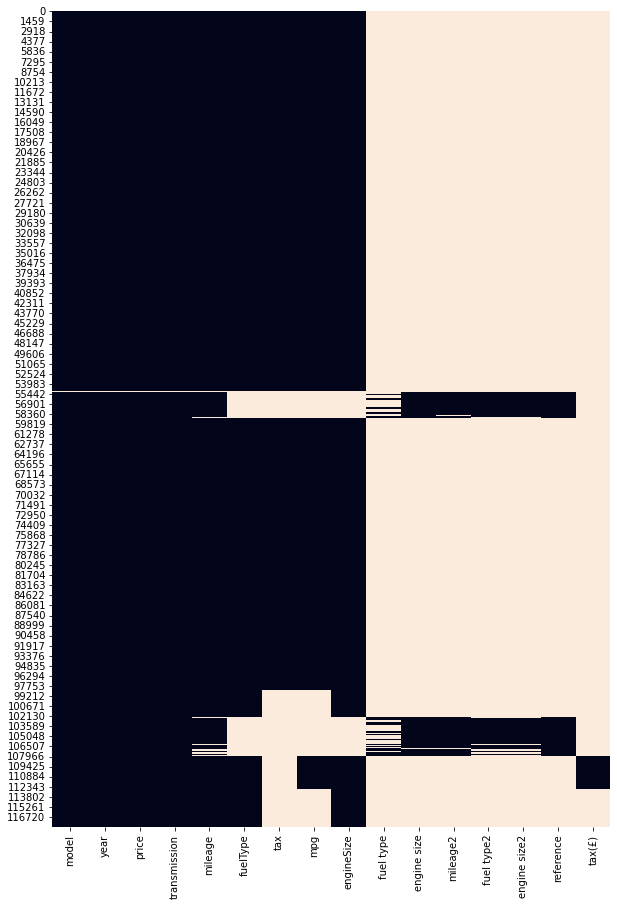

In [ ]:
# Посмотрим на распределение пропусков
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

figure(figsize=(10, 15))
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# Сократим df, то есть уберем колонки где большинство значений null

nedf = df.drop(columns=df.columns[9:])
nedf.dropna(inplace=True)
nedf.reset_index(inplace=True)
nedf

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,Corsa,2018.0,7885,Manual,9876,Petrol,145.0,55.4,1.4
1,1,Corsa,2019.0,11995,Manual,2500,Petrol,145.0,54.3,1.4
2,2,Corsa,2017.0,9777,Automatic,9625,Petrol,145.0,47.9,1.4
3,3,Corsa,2016.0,8500,Manual,25796,Petrol,30.0,55.4,1.4
4,4,Corsa,2019.0,10000,Manual,3887,Petrol,145.0,43.5,1.4
...,...,...,...,...,...,...,...,...,...,...
94322,98328,Eos,2012.0,5990,Manual,74000,Diesel,125.0,58.9,2.0
94323,98329,Fox,2008.0,1799,Manual,88102,Petrol,145.0,46.3,1.2
94324,98330,Fox,2009.0,1590,Manual,70000,Petrol,200.0,42.0,1.4
94325,98331,Fox,2006.0,1250,Manual,82704,Petrol,150.0,46.3,1.2


<Axes: >

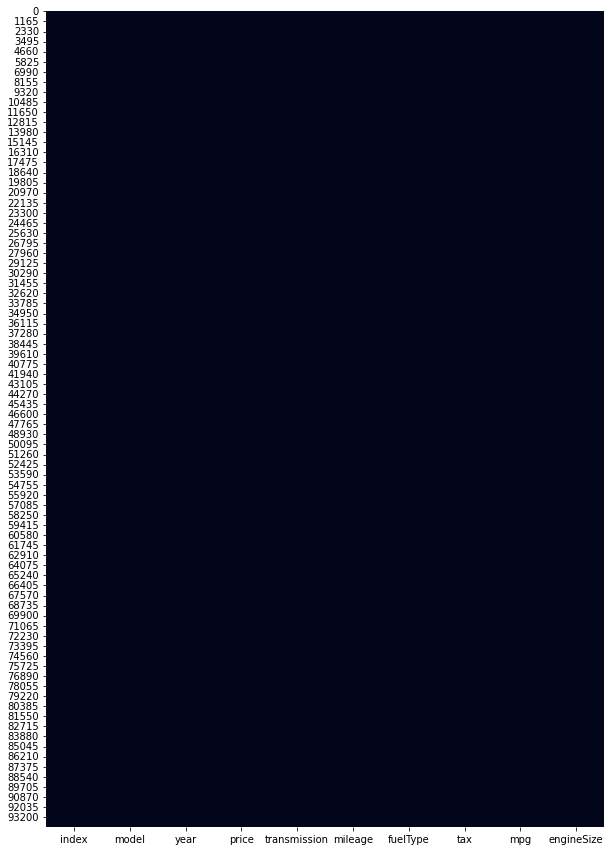

In [ ]:
#Убедимся, что все пропуски пропали
figure(figsize=(10, 15))
sns.heatmap(nedf.isnull(), cbar=False) 

In [ ]:
nedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94327 entries, 0 to 94326
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         94327 non-null  int64  
 1   model         94327 non-null  object 
 2   year          94327 non-null  float64
 3   price         94327 non-null  object 
 4   transmission  94327 non-null  object 
 5   mileage       94327 non-null  object 
 6   fuelType      94327 non-null  object 
 7   tax           94327 non-null  float64
 8   mpg           94327 non-null  float64
 9   engineSize    94327 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 7.2+ MB


In [ ]:
nedf.describe()

,index,year,tax,mpg,engineSize
count,94327.000000,94327.000000,94327.000000,94327.000000,94327.000000
mean,48835.822564,2017.086698,120.256183,55.235816,1.673861
std,28935.767455,2.133897,63.404805,16.291667,0.562523
min,0.000000,1970.000000,0.000000,0.300000,0.000000
25%,23581.500000,2016.000000,125.000000,47.100000,1.300000
50%,47163.000000,2017.000000,145.000000,54.300000,1.600000
75%,74750.500000,2019.000000,145.000000,62.800000,2.000000
max,98332.000000,2060.000000,580.000000,470.800000,6.600000


In [ ]:
nedf.isnull().sum()

index           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [ ]:
# уберем index так как это старые индексы
del nedf['index']

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'tax'}>],
       [<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'engineSize'}>]], dtype=object)

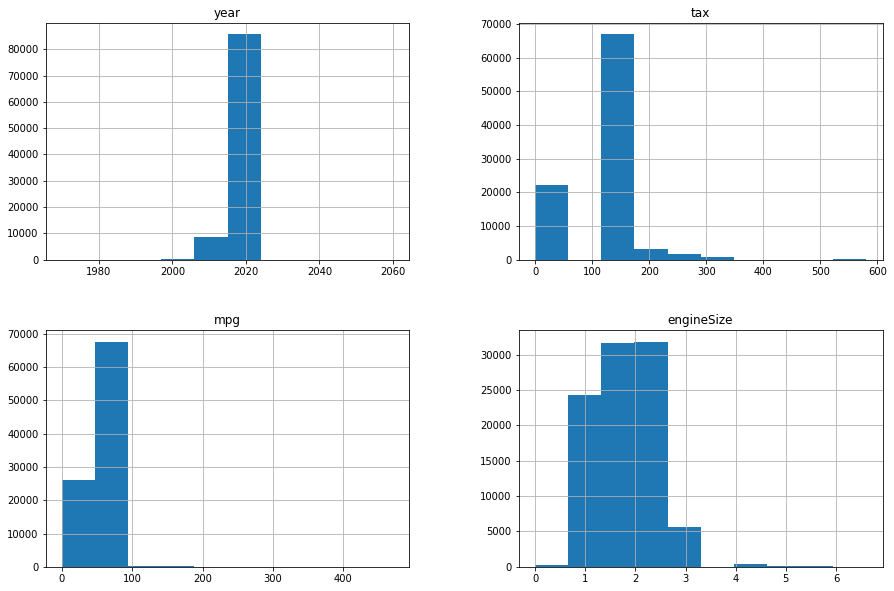

In [ ]:
nedf.hist(figsize=(15, 10))

In [ ]:
# Уберем пробелы из начала названия модели
nedf['model'] = nedf['model'].apply(lambda x: x.strip()) 

In [ ]:
nedf['model'].value_counts()

Fiesta             6557
Golf               4863
Focus              4588
C Class            3747
Corsa              3441
                   ... 
230                   1
220                   1
200                   1
Ranger                1
Transit Tourneo       1
Name: model, Length: 179, dtype: int64

In [ ]:
nedf['year'].describe()

count    94327.000000
mean      2017.086698
std          2.133897
min       1970.000000
25%       2016.000000
50%       2017.000000
75%       2019.000000
max       2060.000000
Name: year, dtype: float64

In [ ]:
nedf[nedf['year'] >= 2021]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
72664,Fiesta,2060.0,6495,Automatic,54807,Petrol,205.0,42.8,1.4


In [ ]:
nedf = nedf[nedf['year'] <= 2021]

In [ ]:
nedf.describe()

,year,tax,mpg,engineSize
count,94326.000000,94326.000000,94326.000000,94326.000000
mean,2017.086243,120.255285,55.235948,1.673864
std,2.129329,63.404540,16.291703,0.562525
min,1970.000000,0.000000,0.300000,0.000000
25%,2016.000000,125.000000,47.100000,1.300000
50%,2017.000000,145.000000,54.300000,1.600000
75%,2019.000000,145.000000,62.800000,2.000000
max,2020.000000,580.000000,470.800000,6.600000


Перекодируем некоторые данные в дата фрейме

In [ ]:
nedf['price'] = nedf['price'].astype('int')
nedf['year'] = nedf['year'].astype('object')
nedf['mpg'] = nedf['mpg'].astype('int')
nedf['mileage'] = nedf['mileage'].astype('int')

<ipython-input-82-65f6fb8239c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nedf['price'] = nedf['price'].astype('int')
<ipython-input-82-65f6fb8239c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nedf['year'] = nedf['year'].astype('object')
<ipython-input-82-65f6fb8239c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
nedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94326 entries, 0 to 94326
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         94326 non-null  object 
 1   year          94326 non-null  object 
 2   price         94326 non-null  int64  
 3   transmission  94326 non-null  object 
 4   mileage       94326 non-null  int64  
 5   fuelType      94326 non-null  object 
 6   tax           94326 non-null  float64
 7   mpg           94326 non-null  int64  
 8   engineSize    94326 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 7.2+ MB


#Кодировка
Используем два подхода к кодировке данных и в дальнейшем выберем лучший по метрикам качества алгоритма 

##Label encoder

In [ ]:
from sklearn import preprocessing #подключаем модуль(?) для предобработки данных
import numpy as np


def number_encode_features(init_df):
    '''
    Функция принимает датафрейм и в дальнейшем кодирует карегорилиальные признаки
    '''
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders 


encoded_data, encoders = number_encode_features(nedf)
encoded_data

<ipython-input-87-67a33789f393>:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtypes[column] == np.object:
<ipython-input-87-67a33789f393>:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if result.dtypes[column] == np.object:
<ipython-input-87-67a33789f393>:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in Num

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,54,23,7885,1,9876,4,145.0,55,1.4
1,54,24,11995,1,2500,4,145.0,54,1.4
2,54,22,9777,0,9625,4,145.0,47,1.4
3,54,21,8500,1,25796,4,30.0,55,1.4
4,54,24,10000,1,3887,4,145.0,43,1.4
...,...,...,...,...,...,...,...,...,...
94322,59,17,5990,1,74000,0,125.0,58,2.0
94323,64,13,1799,1,88102,4,145.0,46,1.2
94324,64,14,1590,1,70000,4,200.0,42,1.4
94325,64,11,1250,1,82704,4,150.0,46,1.2


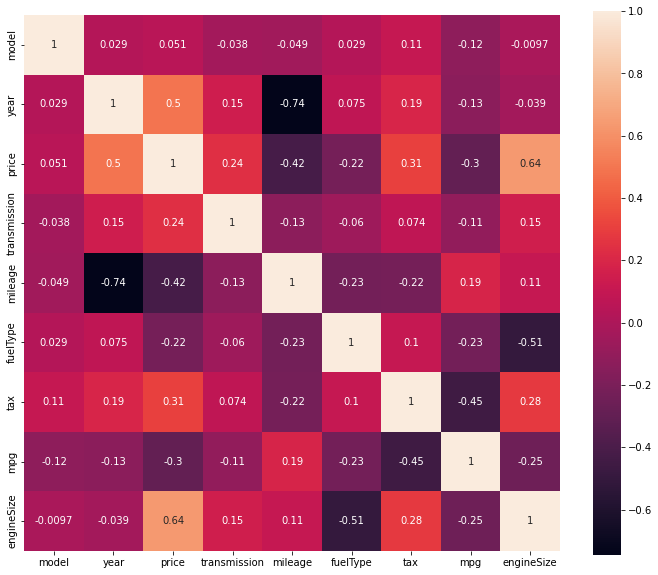

In [ ]:
import matplotlib.pyplot as plt 

plt.subplots(figsize=(12, 10))
sns.heatmap(encoded_data.corr(), square=True, annot=True)
plt.show()

##One-hot

In [ ]:
nedf.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
nedf.reset_index(inplace=True, drop=True)

In [ ]:
nedf

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Corsa,2018.0,7885,Manual,9876,Petrol,145.0,55,1.4
1,Corsa,2019.0,11995,Manual,2500,Petrol,145.0,54,1.4
2,Corsa,2017.0,9777,Automatic,9625,Petrol,145.0,47,1.4
3,Corsa,2016.0,8500,Manual,25796,Petrol,30.0,55,1.4
4,Corsa,2019.0,10000,Manual,3887,Petrol,145.0,43,1.4
...,...,...,...,...,...,...,...,...,...
94321,Eos,2012.0,5990,Manual,74000,Diesel,125.0,58,2.0
94322,Fox,2008.0,1799,Manual,88102,Petrol,145.0,46,1.2
94323,Fox,2009.0,1590,Manual,70000,Petrol,200.0,42,1.4
94324,Fox,2006.0,1250,Manual,82704,Petrol,150.0,46,1.2


In [ ]:
nedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94326 entries, 0 to 94325
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         94326 non-null  object 
 1   year          94326 non-null  object 
 2   price         94326 non-null  int64  
 3   transmission  94326 non-null  object 
 4   mileage       94326 non-null  int64  
 5   fuelType      94326 non-null  object 
 6   tax           94326 non-null  float64
 7   mpg           94326 non-null  int64  
 8   engineSize    94326 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 6.5+ MB


In [ ]:
from sklearn.preprocessing import OneHotEncoder 

categor = nedf[['model', 'transmission', 'fuelType', 'year']]

enc = OneHotEncoder(handle_unknown='ignore')

enc.fit(categor)

codes = enc.transform(categor).toarray()

feature_names = enc.get_feature_names_out(categor.columns)

data_onehot = pd.concat([nedf[['price', 'mileage', 'tax', 'mpg', 'engineSize']],
                         pd.DataFrame(codes, columns=feature_names)], axis=1)

In [ ]:
data_onehot

,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,...,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,7885,9876,145.0,55,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11995,2500,145.0,54,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9777,9625,145.0,47,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,8500,25796,30.0,55,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10000,3887,145.0,43,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94321,5990,74000,125.0,58,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94322,1799,88102,145.0,46,1.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94323,1590,70000,200.0,42,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94324,1250,82704,150.0,46,1.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_onehot.isna().sum()

price          0
mileage        0
tax            0
mpg            0
engineSize     0
              ..
year_2016.0    0
year_2017.0    0
year_2018.0    0
year_2019.0    0
year_2020.0    0
Length: 219, dtype: int64

In [ ]:
nedf.shape

(94326, 9)

In [ ]:
data_onehot.head()

,price,mileage,tax,mpg,engineSize,model_1 Series,model_180,model_2 Series,model_200,model_220,...,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,7885,9876,145.0,55,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11995,2500,145.0,54,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9777,9625,145.0,47,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,8500,25796,30.0,55,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10000,3887,145.0,43,1.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
one_hot_feature_names = data_onehot.columns.values
one_hot_feature_names

array(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_1 Series',
       'model_180', 'model_2 Series', 'model_200', 'model_220',
       'model_230', 'model_3 Series', 'model_4 Series', 'model_5 Series',
       'model_6 Series', 'model_7 Series', 'model_8 Series',
       'model_A Class', 'model_A1', 'model_A2', 'model_A3', 'model_A4',
       'model_A5', 'model_A6', 'model_A7', 'model_A8', 'model_Adam',
       'model_Agila', 'model_Amarok', 'model_Ampera', 'model_Antara',
       'model_Arteon', 'model_Astra', 'model_Auris', 'model_Avensis',
       'model_Aygo', 'model_B Class', 'model_B-MAX', 'model_Beetle',
       'model_C Class', 'model_C-HR', 'model_C-MAX', 'model_CC',
       'model_CL Class', 'model_CLA Class', 'model_CLC Class',
       'model_CLK', 'model_CLS Class', 'model_Caddy', 'model_Caddy Life',
       'model_Caddy Maxi', 'model_Caddy Maxi Life', 'model_California',
       'model_Camry', 'model_Caravelle', 'model_Cascada', 'model_Citigo',
       'model_Combo Life', 'mo

##Train-test-split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_onehot.drop(columns=['price']), data_onehot['price'], test_size=0.2)
X_train_, X_test_, y_train_, y_test_ = train_test_split(encoded_data.drop(['price'], axis=1), encoded_data['price'], test_size=0.2)

# Training



##Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, median_absolute_error 

alg = DecisionTreeRegressor()
alg.fit(X_train, y_train)
preds = alg.predict(X_test)

f'r2 = {r2_score(y_test, preds):.2f} MAE = {median_absolute_error(y_test, preds):.2f}'

'r2 = 0.92 MAE = 990.00'

In [ ]:
y_train.std()

10031.885665108979

In [ ]:
from sklearn.model_selection import GridSearchCV 


param_grid = {'max_depth': [i for i in range(2, 15)],
              'min_samples_split': [i for i in range(2, 30, 3)]}

gs = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)
gs.fit(X_train.values, y_train.values)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 130 candidates, totalling 650 fits


({'max_depth': 14, 'min_samples_split': 14}, 0.9158983621065115)

In [ ]:
preds = gs.predict(X_test)
f'r2 = {r2_score(y_test, preds):.2f} MAE = {median_absolute_error(y_test, preds):.2f}'

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


'r2 = 0.92 MAE = 1189.73'

In [ ]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=14, min_samples_split=14)

[Text(0.418030835060516, 0.9666666666666667, 'x[184] <= 0.5\nsquared_error = 100637396.328\nsamples = 75460\nvalue = 17025.204'),
 Text(0.14693724092259267, 0.9, 'x[2] <= 37.5\nsquared_error = 130321460.331\nsamples = 33222\nvalue = 23187.198'),
 Text(0.04728370500088668, 0.8333333333333334, 'x[3] <= 2.75\nsquared_error = 290126233.173\nsamples = 4587\nvalue = 37936.72'),
 Text(0.025618183631849617, 0.7666666666666667, 'x[0] <= 25535.5\nsquared_error = 95752240.612\nsamples = 2246\nvalue = 29741.033'),
 Text(0.017099108884553998, 0.7, 'x[3] <= 1.8\nsquared_error = 67847089.418\nsamples = 2060\nvalue = 31283.993'),
 Text(0.008489980492995212, 0.6333333333333333, 'x[105] <= 0.5\nsquared_error = 30414855.231\nsamples = 405\nvalue = 22484.61'),
 Text(0.004921085298811846, 0.5666666666666667, 'x[0] <= 6982.5\nsquared_error = 22561743.061\nsamples = 335\nvalue = 24033.675'),
 Text(0.002482709700301472, 0.5, 'x[3] <= 0.6\nsquared_error = 19820871.706\nsamples = 225\nvalue = 25782.458'),
 Text

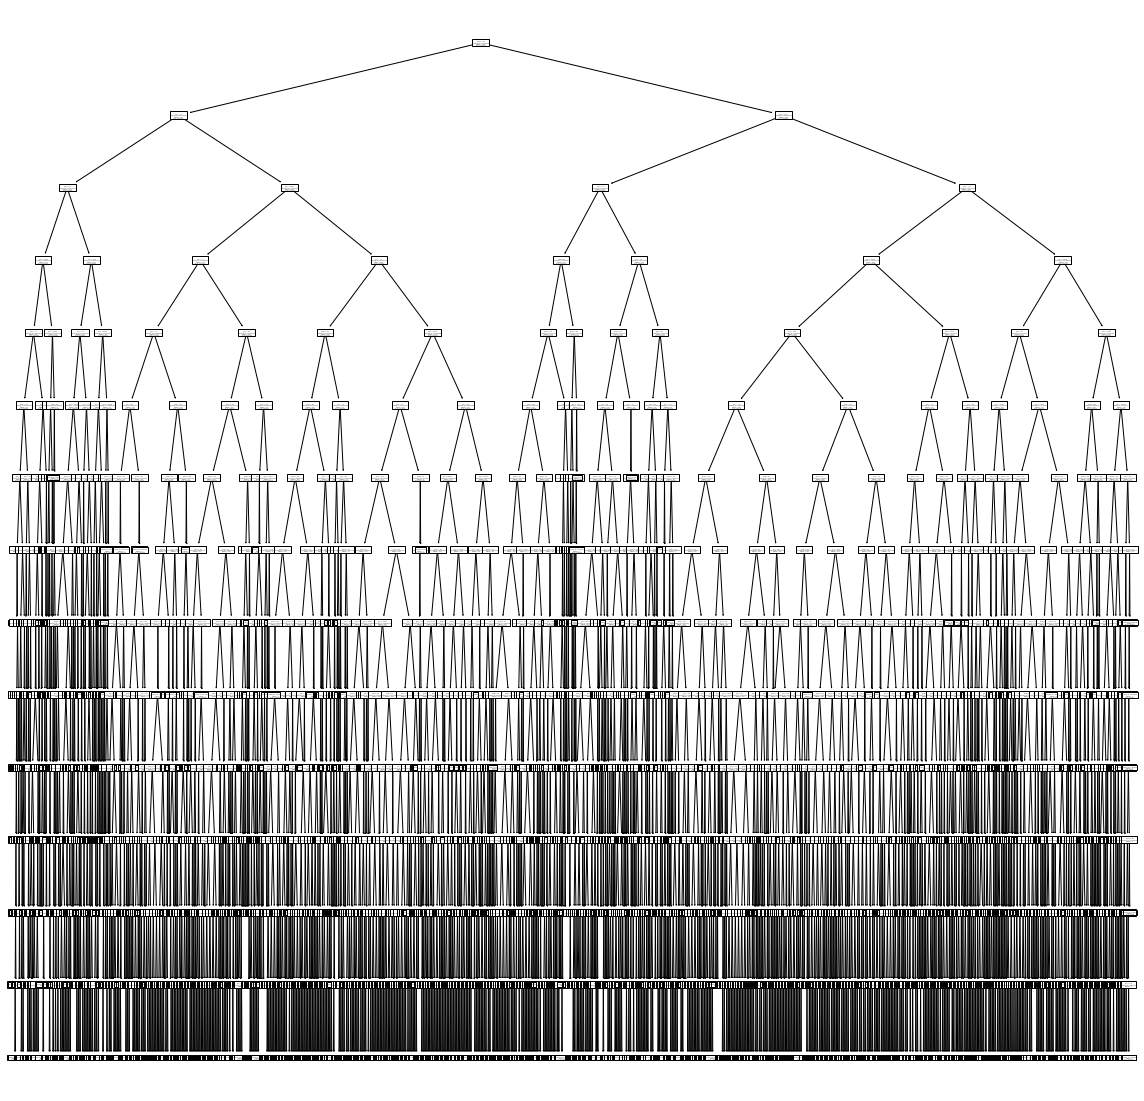

In [ ]:
from sklearn.tree import plot_tree 

plt.figure(figsize=(20, 20))
plot_tree(gs.best_estimator_)

In [ ]:
def plot_feature_importances(gs, column_names, top_n=15):
    imp = pd.Series(gs.best_estimator_.feature_importances_, index = column_names).sort_values(ascending=False)
    plt.figure(figsize=(10, 10))
    plt.title('Важность признаков по Giny Impurity')
    sns.barplot(x = imp.values[:top_n], y = imp.index.values[:top_n], orient='h')

In [ ]:
one_hot_feature_names[:5]

array(['price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype=object)

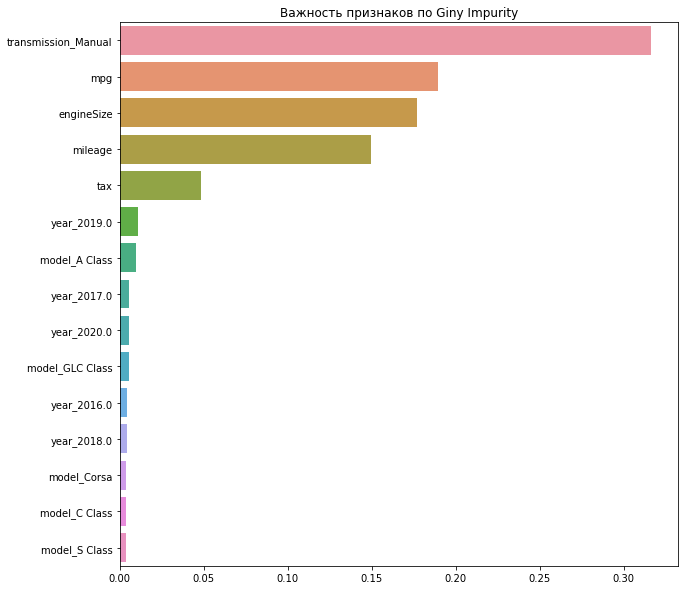

In [ ]:
plot_feature_importances(gs, one_hot_feature_names[1:])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  r2_score, median_absolute_error

alg = DecisionTreeRegressor()
alg.fit(X_train_, y_train_)
preds = alg.predict(X_test_)

f'r2 = {r2_score(y_test_, preds):.2f} MAE = {median_absolute_error(y_test_, preds):.2f}'

'r2 = 0.92 MAE = 950.50'

In [ ]:
X = np.array([[0, 0], [0, 1], [0, 2],
              [1, 0], [1, 1], [1, 2],
              [2, 0], [2, 1], [2, 2]])
y = np.array([[0, 1, 0, 1, 0, 1, 0, 1, 0]])
y = y.T
alg = DecisionTreeRegressor(max_depth=1)
alg.fit(X, y)
median_absolute_error(y, alg.predict(X))

0.5

In [ ]:

param_grid = {'max_depth': [i for i in range(2, 15)],
              'min_samples_split': [i for i in range(2, 30, 3)]}

gs = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)
gs.fit(X, y)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 130 candidates, totalling 650 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


({'max_depth': 2, 'min_samples_split': 2}, nan)

AttributeError: ignored